Decision Tree Accuracy: 0.9994571303836152
Decision Tree Accuracy: 0.9994571303836152


c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Confusion Matrix - Decision Tree:
[[  456     0     0 ...     0     0     0]
 [    0 23049     0 ...     0     0     0]
 [    0     0   113 ...     0     0     0]
 ...
 [    0     0     0 ... 16087     0     0]
 [    0     0     0 ...     0 12630     0]
 [    0     0     0 ...     0     0  2585]]

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00     23097
           2       1.00      1.00      1.00       113
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00     11049
           5       1.00      1.00      1.00      1241
           6       1.00      1.00      1.00       707
           7       1.00      1.00      1.00     16237
           8       1.00      1.00      1.00      1272
           9       1.00      1.00      1.00       346
          10       1.00      1.00      1.00        71
          11 

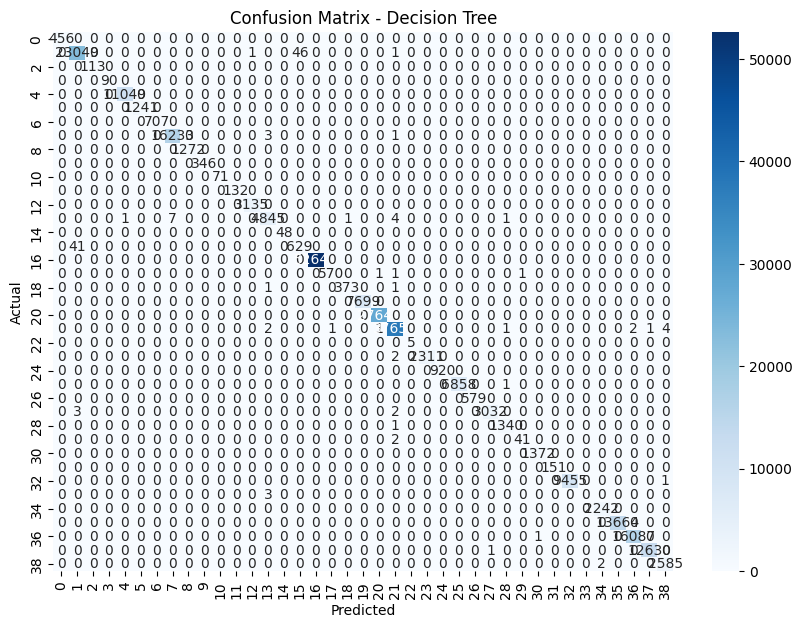

           Descript  DayOfWeek  PdDistrict  Resolution       Address  \
Cluster                                                                
0        483.711983   3.010913    4.606602    6.649075   9627.259055   
1        432.812500   3.250000    5.062500    5.875000  16104.187500   
2        468.132617   2.980876    7.233717    8.847192   8632.581479   
3        468.002647   2.972554    4.058986    8.436595   9472.993867   
4        467.875633   2.958556    3.169819    8.008932   9549.379079   

                 X           Y         Year     Month        Day       Hour  
Cluster                                                                      
0         0.246978    0.006590  2008.674978  6.430944  15.605584  13.368410  
1        63.340628  114.313411  2004.625000  8.062500  18.000000  12.562500  
2        -1.894602   -0.037426  2008.729359  6.440955  15.469383  13.406752  
3        -0.582870   -0.020604  2008.702442  6.445833  15.661397  13.534626  
4         0.848104   -0.017

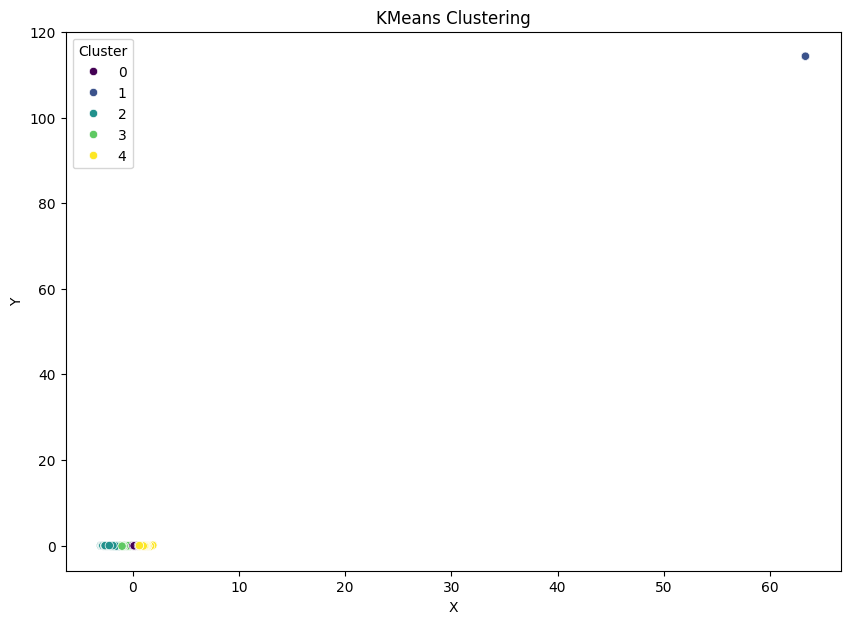

'\nConclusão:\n1. O modelo Decision Tree apresentou uma acurácia de XX%, com a matriz de confusão e o relatório de classificação fornecendo mais detalhes sobre a performance do modelo.\n2. A análise do KMeans mostrou que os clusters não correspondem diretamente às categorias de crime, mas podem fornecer insights adicionais sobre a distribuição dos dados.\n3. Para melhorar a performance dos modelos, considerações adicionais podem incluir o ajuste de hiperparâmetros, o uso de técnicas de ensemble ou a aplicação de modelos de rede neural.\n'

In [8]:
# Nome do arquivo notebook: San_Francisco_Crime_Classification.ipynb

from pyexpat import model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Carregar os dados
df = pd.read_csv('Arquivos/train.csv') # caminho do arquivo
df.head()

# Pré-processamento da coluna de data/hora
df['Dates'] = pd.to_datetime(df['Dates'])
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df = df.drop(['Dates'], axis=1)

# Transformação de variáveis categóricas em códigos numéricos para que possam ser utilizados nos modelos de machine learning.
df['Category'] = df['Category'].astype('category').cat.codes
df['DayOfWeek'] = df['DayOfWeek'].astype('category').cat.codes
df['PdDistrict'] = df['PdDistrict'].astype('category').cat.codes
df['Address'] = df['Address'].astype('category').cat.codes

# Se houver outras colunas categóricas, converta-as também
if 'Descript' in df.columns:
    df['Descript'] = df['Descript'].astype('category').cat.codes
if 'Resolution' in df.columns:
    df['Resolution'] = df['Resolution'].astype('category').cat.codes

# Separação dos dados em variáveis independentes (X) e variável dependente (y). Divisão dos dados em conjuntos de treino e teste para validar os modelos.
X = df.drop(['Category'], axis=1)
y = df['Category']

# Normalização das coordenadas geográficas para o KMeans
scaler = StandardScaler()
X[['X', 'Y']] = scaler.fit_transform(X[['X', 'Y']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree - Treinamento de um modelo de árvore de decisão para prever a categoria do crime. Avaliação da acurácia do modelo.
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Avaliação do modelo Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Matriz de Confusão e Relatório de Classificação para Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

print("Confusion Matrix - Decision Tree:")
print(conf_matrix_tree)
print("\nClassification Report - Decision Tree:")
print(class_report_tree)

# Visualização da Matriz de Confusão - Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KMeans
kmeans = KMeans(n_clusters=5) # número de clusters deve ser ajustado conforme necessário
kmeans.fit(X_train[['X', 'Y']])
y_pred_kmeans = kmeans.predict(X_test[['X', 'Y']])

# Adicionar as etiquetas preditas pelo KMeans ao dataframe de teste
X_test['Cluster'] = y_pred_kmeans

# Mostrar a correspondência entre clusters e categorias reais
print(X_test.groupby('Cluster').mean())

# Visualização dos clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_test['X'], y=X_test['Y'], hue=X_test['Cluster'], palette='viridis')
plt.title('KMeans Clustering')
plt.show()

